# Labraies

In [742]:
import pandas as pd 
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Functionalities

In [743]:
pd.set_option('display.max_columns',60)
pd.set_option('display.max_row',70)

# Data Exection

In [797]:
df1=pd.read_excel(r"C:\vivek data\Camera\ticket_72B8D21.xlsx")

In [798]:
for i in df1.columns.to_list():
    print('**************',i,'**************')
    print(df1[i].value_counts())

************** Zone **************
North           16170
NCR             15525
Bangalore       10248
West            10134
Hyderabad        9279
West Central     9072
Chennai          8005
East central     7079
East             6934
HO                686
Not assigned      489
Name: Zone, dtype: int64
************** Unnamed: 1 **************
Series([], Name: Unnamed: 1, dtype: int64)
************** Region **************
Bangalore City             6920
Telangana & Rest of AP     6486
NCR 1                      6025
Punjab & Others            5600
NCR 2                      4281
Gurgaon                    3761
Chennai City               3446
Rajasthan                  3356
Uttar Pradesh - East       3349
Bihar                      3331
NCR 3                      2987
Karnataka -Upcountry       2939
Kolkata City               2896
MMR - 1                    2638
Kerala                     2310
Madhya Pradesh             2264
AP-Upcountry               2217
Orissa                     2211
C

In [799]:
df=df1.copy()

In [800]:
df.rename(columns={'WM Order Type':'Type of order'},inplace=True)

In [801]:
test=pd.DataFrame(df['Type of order'].value_counts().reset_index())
test

,index,Type of order
0,Ret-DL+,39344
1,Not assigned,29631
2,Ret-DL,15565
3,Proj-Dir,3619
4,Ret-Dir+,2355
5,Ret-DLProj,1580
6,Ret-Dir,1459
7,Ret-FIL,37
8,Ret-FIL+,20
9,Ret-DLInst,5


In [802]:
df['Type of order']=df['Type of order'].replace({'Ret-DL+','Ret-DL','Ret-Dir+','Ret-DLProj','Ret-Dir','Ret-FIL','Ret-FIL+','Ret-DLInst'},'Retail')

In [803]:
df['Type of order'].value_counts().reset_index()

,index,Type of order
0,Retail,60365
1,Not assigned,29631
2,Proj-Dir,3619
3,Proj-FIL,5
4,1,1


# QC

In [804]:
df['Type of order']=df['Type of order'].replace({'Proj-Dir','Proj-FIL'},'Project')

In [805]:
df['Type of order'].value_counts().reset_index()

,index,Type of order
0,Retail,60365
1,Not assigned,29631
2,Project,3624
3,1,1


In [806]:
df_f=df[df['Type of order']=='Retail']
df_f.dropna(how='all',axis=1,inplace=True)

C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\206985146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.dropna(how='all',axis=1,inplace=True)


In [807]:
df_f.head()

,Zone,Region,Opportunity ID,Date Of Enquiry,Opp Created On,City,State,Pincode,Source of Enq,Sales Owner,Sales Owner id,CSE Name,Nature of Work,Influencer Involved,Influencer Involved Name,First Interaction Date,Site Visit Date,Persuasion Date,Showroom Visit Date,Boq Received Date,Product Category,Client expectation Price Bracket,Quote segment,Type of order,WM Quote ID,First Quote Date,Latest Quote Date,Quote Review Date,Expected Closure Month,No. of Sales Quote,Won/Lost/In Process,Last Progression Stage,Order in Hand,Order in Hand Date,Status-Hot / Warm/ Cold,Remarks,Main Competitor,Reason for Status,Expected Site Readiness Date,1st Discount Given Date,2nd Discount Given Date,Quote Area,Next Step,Next Step Due Date,Expected Value,Quote Value,Gross Value,Net Value,Basic Value (at DP),Standard Discount,1st Discount Given,Closed Customer value,Closed Basic value,MSC Material value,MSC Gross Value,Lost Price
0,Bangalore,Bangalore City,354172,09.12.2020,09.12.2020,Bangalore,Karnataka,560078,Reference,Gaonker Enterprises .,105736,#,Renovation,No,#,#,09.12.2020,#,#,#,Not assigned,400-600,Retail,Retail,#,10.12.2020,09.12.2020,#,2453-01-31 00:00:00,1,In Process,Not assigned,#,#,Hot,#,Not assigned,Not assigned,12.12.2020,#,#,#,#,#,"200,000.00 INR","203,785.00 INR",0,0,0,0,0,0,0,0,0,0
1,Bangalore,Bangalore City,351773,03.12.2020,03.12.2020,Bangalore,Karnataka,560078,Reference,Gaonker Enterprises .,105736,#,New Built,No,#,#,03.12.2020,#,#,#,Not assigned,400-600,Retail,Retail,#,05.12.2020,03.12.2020,#,2453-01-31 00:00:00,1,In Process,Not assigned,#,#,Cold,#,Not assigned,Not assigned,12.12.2020,#,#,#,#,#,"100,000.00 INR","1,302,364.00 INR",0,0,0,0,0,0,0,0,0,0
2,Bangalore,Bangalore City,341445,02.11.2020,02.11.2020,Bangalore,Karnataka,560076,Reference,Gaonker Enterprises .,105736,#,Renovation,No,#,#,02.11.2020,#,#,#,Not assigned,400-600,Retail,Retail,#,02.11.2020,02.11.2020,#,2453-01-30 00:00:00,1,In Process,Not assigned,#,#,Cold,#,Not assigned,Not assigned,10.11.2020,#,#,#,#,#,"25,000.00 INR","39,560.00 INR",0,0,0,0,0,0,0,0,0,0
3,Bangalore,Bangalore City,357451,17.12.2020,17.12.2020,Bangalore,Karnataka,560037,Direct Scanning,MANA ENTERPRISES,143753,#,New Built,No,#,#,17.12.2020,#,#,#,uPVC,1000-1200,Retail,Retail,Q0469217,#,21.07.2021,#,2453-01-31 00:00:00,2,Won,Not assigned,#,#,Cold,#,Not assigned,Pending update,19.12.2020,#,#,29.86,#,#,"50,000.00 INR","33,975.50 INR",0.00 INR,"28,511.63 INR","23,186.28 INR",0,0,"36,352.85 INR","28,511.63 INR",0,0,0
4,Bangalore,Bangalore City,350556,30.11.2020,30.11.2020,Bangalore,Karnataka,560034,Others,Forbes Building Systems .,120068,#,New Built,No,#,#,16.11.2020,#,#,#,Not assigned,800-1000,Retail,Retail,#,10.12.2020,30.11.2020,#,2453-01-31 00:00:00,1,Won,Not assigned,#,#,Hot,#,Lingel,Pending update,17.12.2020,#,#,#,#,#,"700,000.00 INR","1,073,524.00 INR",0,0,0,0,0,0,0,0,0,0


In [808]:
na=pd.DataFrame(df_f.isnull().sum()).reset_index().sort_values(by=0,ascending=False)

In [809]:
na.rename(columns={0:'Blank_count'},inplace=True)

In [810]:
df_f.shape[0]

60365

In [811]:
na['% blank']=((na['Blank_count']/df_f.shape[0])*100).round(2)

In [812]:
na.head()
#20-25%

,index,Blank_count,% blank
35,Remarks,133,0.22
38,Expected Site Readiness Date,12,0.02
0,Zone,0,0.00
1,Region,0,0.00
30,Won/Lost/In Process,0,0.00


In [813]:
orders=df_f.groupby(['Zone'])['Opp Created On'].count().reset_index().sort_values(by='Opp Created On',ascending = False).rename(columns={'Opp Created On':'Total_orders'})

In [814]:
orders

,Zone,Total_orders
6,NCR,11766
7,North,11204
0,Bangalore,7446
1,Chennai,6638
9,West,5945
5,Hyderabad,5886
10,West Central,5780
2,East,3517
3,East central,1940
8,Not assigned,133


In [815]:
orders['Total_orders'].sum()

60365

In [816]:
df_f['Won/Lost/In Process'].value_counts()

In Process    29496
Lost          18052
Won            7318
Open           5216
Stopped         283
Name: Won/Lost/In Process, dtype: int64

In [817]:
won=df_f[df_f['Won/Lost/In Process']=='Won']
lost=df_f[df_f['Won/Lost/In Process']=='Lost']
Inprocess=df_f[df_f['Won/Lost/In Process']=='In Process']
Open=df_f[df_f['Won/Lost/In Process']=='Open']
Stopped=df_f[df_f['Won/Lost/In Process']=='Stopped']

In [818]:
df_f['Won/Lost/In Process'].isnull().sum()

0

In [819]:
won_orders=won.groupby(['Zone'])['Opp Created On'].count().reset_index().sort_values(by='Opp Created On',ascending=False).rename(columns={'Opp Created On':'won_orders'})
lost_orders=lost.groupby(['Zone'])['Opp Created On'].count().reset_index().sort_values(by='Opp Created On',ascending =False).rename(columns={'Opp Created On':'lost_orders'})
Inprocess_orders = Inprocess.groupby(['Zone'])['Opp Created On'].count().reset_index().sort_values(by='Opp Created On', ascending =False ).rename(columns={'Opp Created On':'Inprocess_orders'})


In [820]:
won_orders

,Zone,won_orders
6,NCR,1543
7,North,884
1,Chennai,792
0,Bangalore,787
10,West Central,777
5,Hyderabad,727
2,East,683
9,West,608
3,East central,462
4,HO,49


In [821]:
f=pd.merge(won_orders,lost_orders,how='outer',on=['Zone'])
order=orders.merge(f,how='left',on=['Zone'])
order['process_order']=order['Total_orders']-(order['won_orders']+order['lost_orders'])
order['Won_%']=(order['won_orders']/order['Total_orders']*100).round(2)
order['Lost_%']=(order['lost_orders']/order['Total_orders']*100).round(2)
order

,Zone,Total_orders,won_orders,lost_orders,process_order,Won_%,Lost_%
0,NCR,11766,1543,2589,7634,13.11,22.00
1,North,11204,884,5706,4614,7.89,50.93
2,Bangalore,7446,787,1781,4878,10.57,23.92
3,Chennai,6638,792,3635,2211,11.93,54.76
4,West,5945,608,388,4949,10.23,6.53
5,Hyderabad,5886,727,819,4340,12.35,13.91
6,West Central,5780,777,2977,2026,13.44,51.51
7,East,3517,683,35,2799,19.42,1.00
8,East central,1940,462,40,1438,23.81,2.06
9,Not assigned,133,6,58,69,4.51,43.61


In [822]:
df_f.columns

Index(['Zone', 'Region', 'Opportunity ID', 'Date Of Enquiry', 'Opp Created On',
       'City', 'State', 'Pincode', 'Source of Enq', 'Sales Owner',
       'Sales Owner id', 'CSE Name', 'Nature of Work', ' Influencer Involved',
       ' Influencer Involved Name', 'First Interaction Date',
       'Site Visit Date', 'Persuasion Date', 'Showroom Visit Date',
       'Boq Received Date', 'Product Category',
       'Client expectation Price Bracket', 'Quote segment', 'Type of order',
       'WM Quote ID', 'First Quote Date', 'Latest Quote Date',
       'Quote Review Date', 'Expected Closure Month', 'No. of Sales Quote',
       'Won/Lost/In Process', 'Last Progression Stage', 'Order in Hand',
       'Order in Hand Date', 'Status-Hot / Warm/ Cold', 'Remarks',
       'Main Competitor', 'Reason for Status', 'Expected Site Readiness Date',
       '1st Discount Given Date', '2nd Discount Given Date', 'Quote Area',
       'Next Step', 'Next Step Due Date', 'Expected Value', 'Quote Value',
       'Gro

In [823]:
pd.DataFrame(df_f['Expected Value'])

,Expected Value
0,"200,000.00 INR"
1,"100,000.00 INR"
2,"25,000.00 INR"
3,"50,000.00 INR"
4,"700,000.00 INR"
...,...
93594,700000
93595,1000000
93604,50000
93612,100000


In [824]:
pd.DataFrame(df_f[['Zone','Status-Hot / Warm/ Cold']]).value_counts()

Zone          Status-Hot / Warm/ Cold
North         Hot                        7500
NCR           Cold                       6482
              Hot                        5153
Bangalore     Cold                       4280
Chennai       Hot                        4060
North         Cold                       3095
West          Cold                       3071
Hyderabad     Hot                        2999
Bangalore     Hot                        2884
West Central  Hot                        2855
East          Hot                        2615
West Central  Cold                       2457
Hyderabad     Cold                       2405
West          Hot                        2324
Chennai       Cold                       1944
East central  Cold                       1187
East          Cold                        639
Chennai       Warm                        634
North         Warm                        608
East central  Hot                         595
West          Warm                        

In [825]:
warm=df_f[df_f['Status-Hot / Warm/ Cold']=='Warm']
Cold=df_f[df_f['Status-Hot / Warm/ Cold']=='Cold']
Hot=df_f[df_f['Status-Hot / Warm/ Cold']=='Hot']

In [826]:
df_f['Status-Hot / Warm/ Cold'].isnull().sum()

0

In [827]:
warm_status=warm.groupby(['Zone'])['Opp Created On'].count().reset_index().sort_values(by='Opp Created On',ascending=False).rename(columns={'Opp Created On':'Warm_status'})
Cold_status=Cold.groupby(['Zone'])['Opp Created On'].count().reset_index().sort_values(by='Opp Created On',ascending=False).rename(columns={'Opp Created On':'Cold_status'})
Hot_status=Hot.groupby(['Zone'])['Opp Created On'].count().reset_index().sort_values(by='Opp Created On',ascending=False).rename(columns={'Opp Created On':'Hot_status'})

In [828]:
f1=pd.merge(Hot_status , warm_status , how='outer', on = ['Zone'])
status=Cold_status.merge(f1, how = 'outer', on=['Zone'])
status

,Zone,Cold_status,Hot_status,Warm_status
0,NCR,6482,5153,130
1,Bangalore,4280,2884,282
2,North,3095,7500,608
3,West,3071,2324,550
4,West Central,2457,2855,468
5,Hyderabad,2405,2999,482
6,Chennai,1944,4060,634
7,East central,1187,595,158
8,East,639,2615,263
9,HO,55,40,15


In [996]:
status['cold_%']=(status['Cold_status']/order['Total_orders']*100).round(2)
status['Hot_%']=(status['Hot_status']/order['Total_orders']*100).round(2)
status['warm_%']=(status['Warm_status']/order['Total_orders']*100).round(2)

In [997]:
status

,Zone,Cold_status,Hot_status,Warm_status,cold_%,Hot_%,war_%,warm_%
0,NCR,6482,5153,130,55.09,43.80,1.10,1.10
1,Bangalore,4280,2884,282,38.20,25.74,2.52,2.52
2,North,3095,7500,608,41.57,100.73,8.17,8.17
3,West,3071,2324,550,46.26,35.01,8.29,8.29
4,West Central,2457,2855,468,41.33,48.02,7.87,7.87
5,Hyderabad,2405,2999,482,40.86,50.95,8.19,8.19
6,Chennai,1944,4060,634,33.63,70.24,10.97,10.97
7,East central,1187,595,158,33.75,16.92,4.49,4.49
8,East,639,2615,263,32.94,134.79,13.56,13.56
9,HO,55,40,15,41.35,30.08,11.28,11.28


In [993]:
55.090940+43.795682+1.104878

99.9915

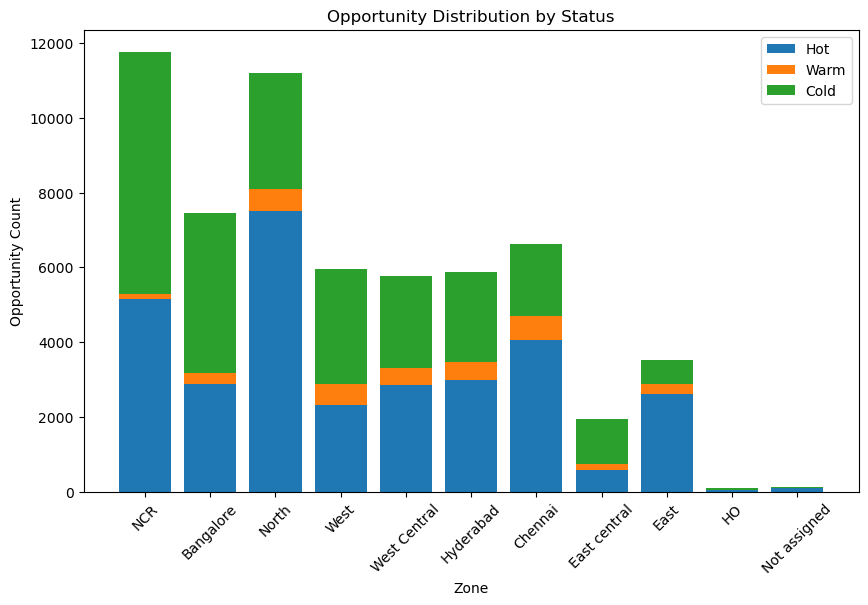

In [829]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(status['Zone'], status['Hot_status'], label='Hot')
plt.bar(status['Zone'], status['Warm_status'], label='Warm', bottom=status['Hot_status'])
plt.bar(status['Zone'], status['Cold_status'], label='Cold', bottom=status['Hot_status'] + status['Warm_status'])
plt.xlabel('Zone')
plt.ylabel('Opportunity Count')
plt.title('Opportunity Distribution by Status')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [830]:
df_f.columns

Index(['Zone', 'Region', 'Opportunity ID', 'Date Of Enquiry', 'Opp Created On',
       'City', 'State', 'Pincode', 'Source of Enq', 'Sales Owner',
       'Sales Owner id', 'CSE Name', 'Nature of Work', ' Influencer Involved',
       ' Influencer Involved Name', 'First Interaction Date',
       'Site Visit Date', 'Persuasion Date', 'Showroom Visit Date',
       'Boq Received Date', 'Product Category',
       'Client expectation Price Bracket', 'Quote segment', 'Type of order',
       'WM Quote ID', 'First Quote Date', 'Latest Quote Date',
       'Quote Review Date', 'Expected Closure Month', 'No. of Sales Quote',
       'Won/Lost/In Process', 'Last Progression Stage', 'Order in Hand',
       'Order in Hand Date', 'Status-Hot / Warm/ Cold', 'Remarks',
       'Main Competitor', 'Reason for Status', 'Expected Site Readiness Date',
       '1st Discount Given Date', '2nd Discount Given Date', 'Quote Area',
       'Next Step', 'Next Step Due Date', 'Expected Value', 'Quote Value',
       'Gro

In [831]:
pd.DataFrame(df_f['Expected Value'])

,Expected Value
0,"200,000.00 INR"
1,"100,000.00 INR"
2,"25,000.00 INR"
3,"50,000.00 INR"
4,"700,000.00 INR"
...,...
93594,700000
93595,1000000
93604,50000
93612,100000


In [832]:
df_f.rename(columns={'Expected Value':'Total_sales'},inplace=True)

C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\2004943895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.rename(columns={'Expected Value':'Total_sales'},inplace=True)


In [833]:
df_f['dup_sales']=df_f['Total_sales']

C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\2497913334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['dup_sales']=df_f['Total_sales']


In [834]:
df_f['Total_sales']=df_f['Total_sales'].str.replace('INR','')
df_f['Total_sales']=df_f['Total_sales'].str.replace(',','')
df_f['Total_sales']=df_f['Total_sales'].str.replace('USD','')

C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\310293940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Total_sales']=df_f['Total_sales'].str.replace('INR','')
C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\310293940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Total_sales']=df_f['Total_sales'].str.replace(',','')
C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\310293940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [835]:
df_f['Total_sales']=np.where(df_f['Total_sales'].isnull(),df_f['dup_sales'],df_f['Total_sales'])

C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\2800516001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Total_sales']=np.where(df_f['Total_sales'].isnull(),df_f['dup_sales'],df_f['Total_sales'])


In [836]:
df_f[['Total_sales','dup_sales']]

,Total_sales,dup_sales
0,200000.00,"200,000.00 INR"
1,100000.00,"100,000.00 INR"
2,25000.00,"25,000.00 INR"
3,50000.00,"50,000.00 INR"
4,700000.00,"700,000.00 INR"
...,...,...
93594,700000,700000
93595,1000000,1000000
93604,50000,50000
93612,100000,100000


In [837]:
df_f['Total_sales']=pd.to_numeric(df_f['Total_sales'])

C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\79928588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Total_sales']=pd.to_numeric(df_f['Total_sales'])


In [838]:
df_f['Total_sales_cr']=(df_f['Total_sales']/10000000)*100

C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\120666098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Total_sales_cr']=(df_f['Total_sales']/10000000)*100


In [839]:
Overall_sales=df_f.groupby(['Zone'])['Total_sales'].sum().reset_index()
Overall_sales.rename(columns={'Total_sales':'Overall_sales'},inplace=True)
Overall_sales['Overall_sales_cr']=(Overall_sales['Overall_sales']/10000000).round(2)

In [840]:
Overall_sales

,Zone,Overall_sales,Overall_sales_cr
0,Bangalore,1.839681e+09,183.97
1,Chennai,1.671610e+09,167.16
2,East,8.518174e+08,85.18
3,East central,5.534752e+08,55.35
4,HO,2.520384e+07,2.52
5,Hyderabad,1.572437e+09,157.24
6,NCR,3.640374e+09,364.04
7,North,3.229763e+09,322.98
8,Not assigned,3.449745e+07,3.45
9,West,1.799162e+09,179.92


In [841]:
won=df_f[df_f['Won/Lost/In Process']=='Won']
lost=df_f[df_f['Won/Lost/In Process']=='Lost']

In [842]:
won_sales=won.groupby(['Zone'])['Total_sales'].sum().reset_index()
won_sales.rename(columns={'Total_sales':'won_sales'},inplace=True)
won_sales['won_sales_cr']=(won_sales['won_sales']/10000000).round(2)

In [843]:
won_sales

,Zone,won_sales,won_sales_cr
0,Bangalore,2.424416e+08,24.24
1,Chennai,2.540165e+08,25.40
2,East,2.385636e+08,23.86
3,East central,1.425647e+08,14.26
4,HO,1.044151e+07,1.04
5,Hyderabad,2.270147e+08,22.70
6,NCR,4.066772e+08,40.67
7,North,2.832754e+08,28.33
8,Not assigned,1.340001e+06,0.13
9,West,2.333883e+08,23.34


In [844]:
lost_sales=won.groupby(['Zone'])['Total_sales'].sum().reset_index()
lost_sales.rename(columns={'Total_sales':'lost_sales'},inplace=True)
lost_sales['lost_sales_cr']=(lost_sales['lost_sales']/10000000).round(2)

In [845]:
lost_sales

,Zone,lost_sales,lost_sales_cr
0,Bangalore,2.424416e+08,24.24
1,Chennai,2.540165e+08,25.40
2,East,2.385636e+08,23.86
3,East central,1.425647e+08,14.26
4,HO,1.044151e+07,1.04
5,Hyderabad,2.270147e+08,22.70
6,NCR,4.066772e+08,40.67
7,North,2.832754e+08,28.33
8,Not assigned,1.340001e+06,0.13
9,West,2.333883e+08,23.34


In [846]:
a=Overall_sales.merge(won_sales,how='outer',on=['Zone'])
sales_exp=a.merge(lost_sales,how='outer',on=['Zone'])
sales_exp


,Zone,Overall_sales,Overall_sales_cr,won_sales,won_sales_cr,lost_sales,lost_sales_cr
0,Bangalore,1.839681e+09,183.97,2.424416e+08,24.24,2.424416e+08,24.24
1,Chennai,1.671610e+09,167.16,2.540165e+08,25.40,2.540165e+08,25.40
2,East,8.518174e+08,85.18,2.385636e+08,23.86,2.385636e+08,23.86
3,East central,5.534752e+08,55.35,1.425647e+08,14.26,1.425647e+08,14.26
4,HO,2.520384e+07,2.52,1.044151e+07,1.04,1.044151e+07,1.04
5,Hyderabad,1.572437e+09,157.24,2.270147e+08,22.70,2.270147e+08,22.70
6,NCR,3.640374e+09,364.04,4.066772e+08,40.67,4.066772e+08,40.67
7,North,3.229763e+09,322.98,2.832754e+08,28.33,2.832754e+08,28.33
8,Not assigned,3.449745e+07,3.45,1.340001e+06,0.13,1.340001e+06,0.13
9,West,1.799162e+09,179.92,2.333883e+08,23.34,2.333883e+08,23.34


In [847]:
sales_exp=sales_exp[['Zone','Overall_sales_cr','won_sales_cr','lost_sales_cr']]
sales_exp

,Zone,Overall_sales_cr,won_sales_cr,lost_sales_cr
0,Bangalore,183.97,24.24,24.24
1,Chennai,167.16,25.40,25.40
2,East,85.18,23.86,23.86
3,East central,55.35,14.26,14.26
4,HO,2.52,1.04,1.04
5,Hyderabad,157.24,22.70,22.70
6,NCR,364.04,40.67,40.67
7,North,322.98,28.33,28.33
8,Not assigned,3.45,0.13,0.13
9,West,179.92,23.34,23.34


In [848]:
order=order.merge(sales_exp,how='left',on=['Zone'])
order.sort_values(by=['Overall_sales_cr'],ascending=False)

,Zone,Total_orders,won_orders,lost_orders,process_order,Won_%,Lost_%,Overall_sales_cr,won_sales_cr,lost_sales_cr
0,NCR,11766,1543,2589,7634,13.11,22.00,364.04,40.67,40.67
1,North,11204,884,5706,4614,7.89,50.93,322.98,28.33,28.33
6,West Central,5780,777,2977,2026,13.44,51.51,263.85,29.29,29.29
2,Bangalore,7446,787,1781,4878,10.57,23.92,183.97,24.24,24.24
4,West,5945,608,388,4949,10.23,6.53,179.92,23.34,23.34
3,Chennai,6638,792,3635,2211,11.93,54.76,167.16,25.40,25.40
5,Hyderabad,5886,727,819,4340,12.35,13.91,157.24,22.70,22.70
7,East,3517,683,35,2799,19.42,1.00,85.18,23.86,23.86
8,East central,1940,462,40,1438,23.81,2.06,55.35,14.26,14.26
9,Not assigned,133,6,58,69,4.51,43.61,3.45,0.13,0.13


In [849]:
t=order.merge(status,how='outer',on=['Zone'])
t

,Zone,Total_orders,won_orders,lost_orders,process_order,Won_%,Lost_%,Overall_sales_cr,won_sales_cr,lost_sales_cr,Cold_status,Hot_status,Warm_status
0,NCR,11766,1543,2589,7634,13.11,22.00,364.04,40.67,40.67,6482,5153,130
1,North,11204,884,5706,4614,7.89,50.93,322.98,28.33,28.33,3095,7500,608
2,Bangalore,7446,787,1781,4878,10.57,23.92,183.97,24.24,24.24,4280,2884,282
3,Chennai,6638,792,3635,2211,11.93,54.76,167.16,25.40,25.40,1944,4060,634
4,West,5945,608,388,4949,10.23,6.53,179.92,23.34,23.34,3071,2324,550
5,Hyderabad,5886,727,819,4340,12.35,13.91,157.24,22.70,22.70,2405,2999,482
6,West Central,5780,777,2977,2026,13.44,51.51,263.85,29.29,29.29,2457,2855,468
7,East,3517,683,35,2799,19.42,1.00,85.18,23.86,23.86,639,2615,263
8,East central,1940,462,40,1438,23.81,2.06,55.35,14.26,14.26,1187,595,158
9,Not assigned,133,6,58,69,4.51,43.61,3.45,0.13,0.13,19,109,5


In [657]:
df_f[' Influencer Involved'].value_counts()

No              58789
Yes              1165
Not assigned      411
Name:  Influencer Involved, dtype: int64

In [659]:
df_f['Product Category'].unique()

array(['Not assigned', 'uPVC', 'Aluminium', 'Internal Door',
       'uPVC & Internal Door', 'uPVC & Aluminium',
       'uPVC, Aluminium & Internal Door', 'Aluminium & Internal Door'],
      dtype=object)

In [660]:
cat=df_f.groupby(['Zone'])['Product Category'].count().reset_index()

In [661]:
cat

,Zone,Product Category
0,Bangalore,7446
1,Chennai,6638
2,East,3517
3,East central,1940
4,HO,110
5,Hyderabad,5886
6,NCR,11766
7,North,11204
8,Not assigned,133
9,West,5945


In [663]:
status.corr()

,Cold_status,Hot_status,Warm_status
Cold_status,1.000000,0.656764,0.254814
Hot_status,0.656764,1.000000,0.636249
Warm_status,0.254814,0.636249,1.000000


In [664]:
df_f.columns

Index(['Zone', 'Region', 'Opportunity ID', 'Date Of Enquiry', 'Opp Created On',
       'City', 'State', 'Pincode', 'Source of Enq', 'Sales Owner',
       'Sales Owner id', 'CSE Name', 'Nature of Work', ' Influencer Involved',
       ' Influencer Involved Name', 'First Interaction Date',
       'Site Visit Date', 'Persuasion Date', 'Showroom Visit Date',
       'Boq Received Date', 'Product Category',
       'Client expectation Price Bracket', 'Quote segment', 'Type of order',
       'WM Quote ID', 'First Quote Date', 'Latest Quote Date',
       'Quote Review Date', 'Expected Closure Month', 'No. of Sales Quote',
       'Won/Lost/In Process', 'Last Progression Stage', 'Order in Hand',
       'Order in Hand Date', 'Status-Hot / Warm/ Cold', 'Remarks',
       'Main Competitor', 'Reason for Status', 'Expected Site Readiness Date',
       '1st Discount Given Date', '2nd Discount Given Date', 'Quote Area',
       'Next Step', 'Next Step Due Date', 'Total_sales', 'Quote Value',
       'Gross 

In [666]:
df_f['Gross Value']

0               0
1               0
2               0
3        0.00 INR
4               0
           ...   
93594           0
93595           0
93604           0
93612           0
93618           0
Name: Gross Value, Length: 60365, dtype: object

In [874]:
df_f['Total revenue']=df_f['Gross Value']

C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\795667191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Total revenue']=df_f['Gross Value']


In [875]:
df_f['Gross Value']=df_f['Gross Value'].str.replace('INR','')
df_f['Gross Value']=df_f['Gross Value'].str.replace(',','')
df_f['Gross Value']=df_f['Gross Value'].str.replace('USD','')

C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\978672096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Gross Value']=df_f['Gross Value'].str.replace('INR','')
C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\978672096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Gross Value']=df_f['Gross Value'].str.replace(',','')
C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\978672096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [877]:
df_f['Gross Value']=np.where(df_f['Gross Value'].isnull(),df_f['Total revenue'],df_f['Gross Value'])

C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\2737071792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Gross Value']=np.where(df_f['Gross Value'].isnull(),df_f['Total revenue'],df_f['Gross Value'])


In [674]:
df_f[['Total revenue','Gross Value']].head(10)

,Total revenue,Gross Value
0,0,0
1,0,0
2,0,0
3,0.00 INR,0.00
4,0,0
5,"243,771.32 INR",243771.32
6,"545,332.28 INR",545332.28
7,"205,686.40 INR",205686.40
9,"43,391.11 INR",43391.11
10,"622,225.07 INR",622225.07


In [880]:
df_f['Gross Value']=pd.to_numeric(df_f['Gross Value'])

C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\333528888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Gross Value']=pd.to_numeric(df_f['Gross Value'])


In [951]:
# Revenue Distribution by Product Category
category_revenue = df_f.groupby('Product Category')['Gross Value'].sum().reset_index()
category_revenue['Gross Value_cr']=((df_f['Gross Value']/10000000)*100).round(2)
category_revenue

,Product Category,Gross Value,Gross Value_cr
0,Aluminium,4.216764e+08,0.00
1,Aluminium & Internal Door,1.990420e+05,0.00
2,Internal Door,1.196877e+07,0.00
3,Not assigned,0.000000e+00,0.00
4,uPVC,2.827761e+09,0.00
5,uPVC & Aluminium,4.022250e+08,2.44
6,uPVC & Internal Door,6.096047e+07,5.45
7,"uPVC, Aluminium & Internal Door",2.608200e+06,2.06


In [685]:
# Top Revenue Contributors
top_contributors = df_f.groupby('Opportunity ID')['Gross Value'].sum().nlargest(5).reset_index()
top_contributors

,Opportunity ID,Gross Value
0,376712,27575712.10
1,351488,15242744.84
2,316575,10922095.58
3,341584,10097057.02
4,347676,10067967.71


In [740]:
lost_opportunity_value = df_f[df_f['Won/Lost/In Process'] == 'Lost']['Lost Price'].()
lost_opportunity_value

16209

In [852]:
opportunity_counts = df_f['Nature of Work'].value_counts()
opportunity_counts

New Built      40294
Renovation     13952
Replacement     5143
#                976
Name: Nature of Work, dtype: int64

In [935]:
# Replace '#' with 'NewName' in the 'ColumnName' column
df_f['Nature of Work'] = df_f['Nature of Work'].replace('#', 'Demolition')

e= df_f.groupby(['Nature of Work', 'Product Category']).size().reset_index(name='Occurrences')
e

C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\214174331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Nature of Work'] = df_f['Nature of Work'].replace('#', 'Demolition')


,Nature of Work,Product Category,Occurrences
0,Demolition,Not assigned,968
1,Demolition,uPVC,7
2,Demolition,uPVC & Internal Door,1
3,New Built,Aluminium,332
4,New Built,Aluminium & Internal Door,2
5,New Built,Internal Door,62
6,New Built,Not assigned,34003
7,New Built,uPVC,5572
8,New Built,uPVC & Aluminium,186
9,New Built,uPVC & Internal Door,133


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


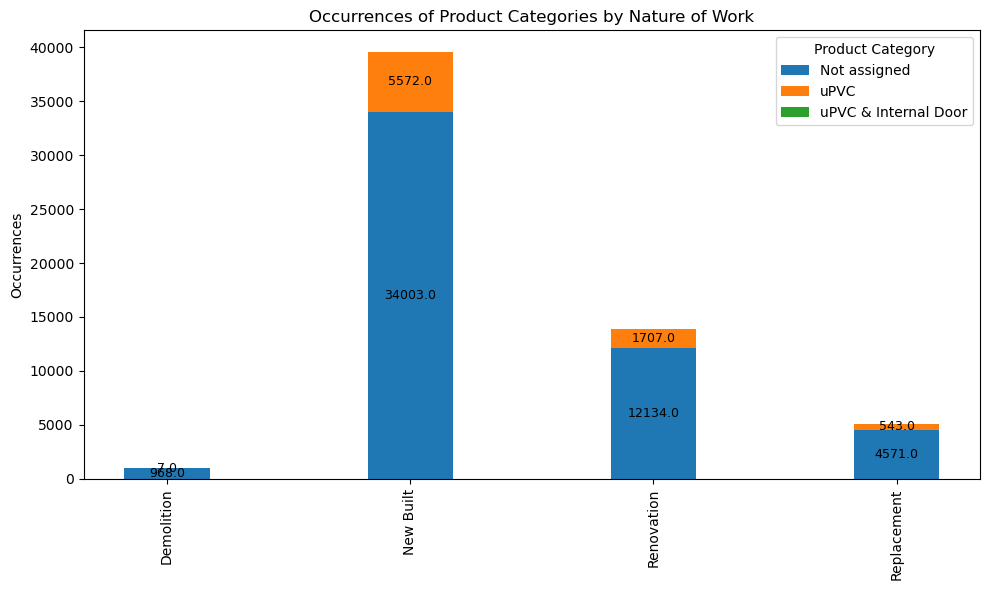

In [941]:

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35


nature_of_work = e['Nature of Work'].unique()

index = np.arange(len(nature_of_work))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Initialize the y-position for each bar
y_pos = np.zeros(len(nature_of_work))

# Create a stacked bar for each product category
for i, category in enumerate(e['Product Category'].unique()[:3]):
    # Filter the data for the current product category
    category_data = e[e['Product Category'] == category]
    
    # Create the stacked bar
    ax.bar(index, category_data['Occurrences'], bar_width, bottom=y_pos, label=category, color=colors[i])
    
    # Update the y-position for the next bar
    y_pos += category_data['Occurrences']

# Set the x-axis ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(nature_of_work, rotation=90)

# Set the y-axis label
ax.set_ylabel('Occurrences')

# Set the chart title
ax.set_title('Occurrences of Product Categories by Nature of Work')

# Add a legend with names
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Product Category')

# Add information for each element
for i, rect in enumerate(ax.patches):
    width = rect.get_width()
    height = rect.get_height()
    x = rect.get_x()
    y = rect.get_y()
    
    # Display the occurrence count above each bar segment
    ax.text(x + width/2, y + height/2, height, ha='center', va='center', fontsize=9)

# Display the chart
plt.tight_layout()
plt.show()


In [882]:
# Profitability Analysis
df_f['profit_margin'] = df_f['Total_sales'] - df_f['Gross Value']

C:\Users\yoges\AppData\Local\Temp\ipykernel_26340\2600467384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['profit_margin'] = df_f['Total_sales'] - df_f['Gross Value']


In [884]:
df_f['profit_margin'].isnull().sum()

0

In [909]:
profitability_analysis= df_f.groupby('Opportunity ID')['profit_margin'].sum().reset_index().sort_values(by='profit_margin',ascending=False)
profitability_analysis['profit_margin_cr']=(df_f['profit_margin']/10000000).round(2)
profitability_analysis

,Opportunity ID,profit_margin,profit_margin_cr
10631,274075,3.400000e+08,0.04
42120,334959,2.500000e+08,0.05
55709,360712,1.700000e+08,0.10
3332,259172,1.230000e+08,0.02
21327,297241,1.200000e+08,0.07
...,...,...,...
32415,317556,-9.800412e+06,NaN
41371,333630,-9.845013e+06,NaN
31892,316575,-1.082210e+07,0.02
50942,351488,-1.524274e+07,NaN


In [910]:
negative_gross_value_rows = df_f[df_f['profit_margin'] < 0]
negative_gross_value_indices = negative_gross_value_rows.index

print("Index numbers of rows with negative gross value:")
print(negative_gross_value_indices)


Index numbers of rows with negative gross value:
Int64Index([    5,     6,     7,    10,    15,    17,    25,    32,    39,
               41,
            ...
            92989, 92991, 93039, 93127, 93166, 93168, 93212, 93289, 93328,
            93489],
           dtype='int64', length=3527)


In [960]:
opportunity_counts = df_f['Status-Hot / Warm/ Cold'].value_counts()

print(opportunity_counts)

Hot             31134
Cold            25634
Warm             3595
Not assigned        2
Name: Status-Hot / Warm/ Cold, dtype: int64


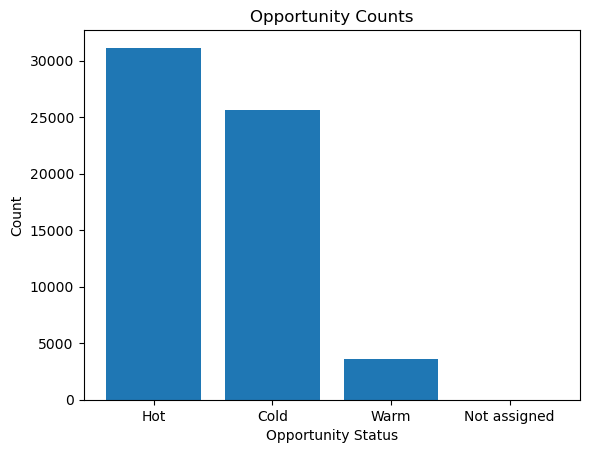

In [961]:
plt.bar(opportunity_counts.index, opportunity_counts.values)
plt.xlabel('Opportunity Status')
plt.ylabel('Count')
plt.title('Opportunity Counts')
plt.show()


In [962]:
opportunity_counts = df['Status-Hot / Warm/ Cold'].value_counts()

print(opportunity_counts)

Hot             60129
Cold            29503
Warm             3986
Not assigned        3
Name: Status-Hot / Warm/ Cold, dtype: int64


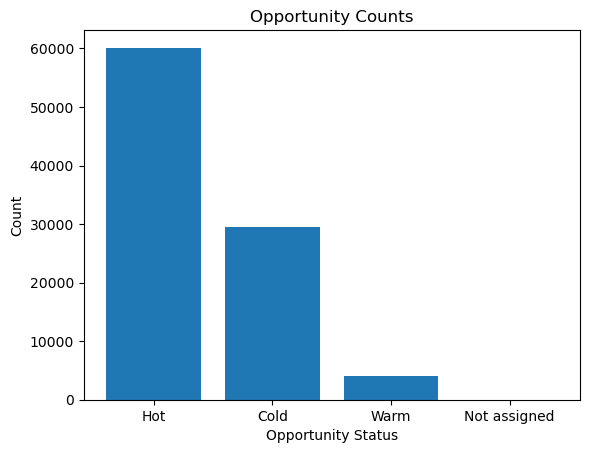

In [963]:
plt.bar(opportunity_counts.index, opportunity_counts.values)
plt.xlabel('Opportunity Status')
plt.ylabel('Count')
plt.title('Opportunity Counts')
plt.show()


In [979]:
import plotly.express as px

In [980]:
status

,Zone,Cold_status,Hot_status,Warm_status
0,NCR,6482,5153,130
1,Bangalore,4280,2884,282
2,North,3095,7500,608
3,West,3071,2324,550
4,West Central,2457,2855,468
5,Hyderabad,2405,2999,482
6,Chennai,1944,4060,634
7,East central,1187,595,158
8,East,639,2615,263
9,HO,55,40,15
